In [32]:
#1動画の読み込み
from google.colab import drive
drive.mount('/content/drive')

import cv2

path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/"
r_video = cv2.VideoCapture(path+"Flowers - 66823.mp4")


print("横のサイズ:", r_video.get(cv2.CAP_PROP_FRAME_WIDTH))
print("縦のサイズ:", r_video.get(cv2.CAP_PROP_FRAME_HEIGHT))


fps = r_video.get(cv2.CAP_PROP_FPS)
print("FPS:", fps)

frame_num = r_video.get(cv2.CAP_PROP_FRAME_COUNT)
print("総フレーム数:", frame_num)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
横のサイズ: 1280.0
縦のサイズ: 720.0
FPS: 23.976023976023978
総フレーム数: 147.0


True

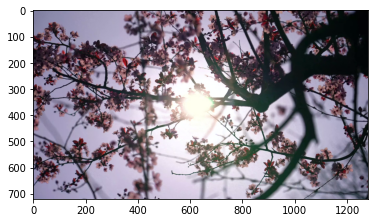

In [33]:
#2 サムネイル画像の作成
#import cv2
from matplotlib import pyplot as plt

r_video = cv2.VideoCapture(path+"Flowers - 66823.mp4")
ret, frame = r_video.read()

show_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
plt.imshow(show_frame)

cv2.imwrite(path    + "output/" "6319118_Flowers_thumb.jpg", show_frame)




In [34]:
#3 ファイル名のパース
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import numpy as np

print("\n")

name = "Flowers - 66823.mp4"
print("filename: " + name)
name = name.replace('-',' ')
name = name.replace('.',' ')
print (name)

namelist=name.split()
print(namelist)

print("Title: " + namelist[0])
print("ID: " + namelist[1])

print("\n")

name = "Cat - 66004.mp4" 
print("filename: " + name)
name = name.replace('-',' ')
name = name.replace('.',' ')
print (name)

namelist=name.split()
print(namelist)

print("Title: " + namelist[0])
print("ID: " + namelist[1])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


filename: Flowers - 66823.mp4
Flowers   66823 mp4
['Flowers', '66823', 'mp4']
Title: Flowers
ID: 66823


filename: Cat - 66004.mp4
Cat   66004 mp4
['Cat', '66004', 'mp4']
Title: Cat
ID: 66004


最終フレームで二値化出来ているか確認


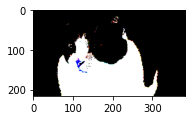

In [35]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
path="/content/drive/MyDrive/Colab Notebooks/dataset/videos/"
from matplotlib import pyplot as plt
catvideo=cv2.VideoCapture(path + "Cat - 66004.mp4")

width = int(catvideo.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(catvideo.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(catvideo.get(cv2.CAP_PROP_FPS))
frame_size=(int(width*0.3),int(height*0.3))



w_video = cv2.VideoWriter(path +"output/"+"63191118_cat_binary.mp4",cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), fps ,frame_size)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)

print("最終フレームで二値化出来ているか確認")
while True:
  ret, frame = catvideo.read()
  if not ret:
    break
  resized_frame=cv2.resize(frame,(int(width*0.3), int(height*0.3)))
  gray =cv2.cvtColor(resized_frame, cv2.IMREAD_GRAYSCALE)
  retval, resized_BW_frame = cv2.threshold(gray,128,255, cv2.THRESH_BINARY)
  resized_BW_frame = cv2.resize(resized_BW_frame,(int(width*0.3), int(height*0.3)))
  ax1.imshow(resized_BW_frame)
  w_video.write(resized_BW_frame)
catvideo.release()
w_video.release()


sr: 44100
len(y): 264600


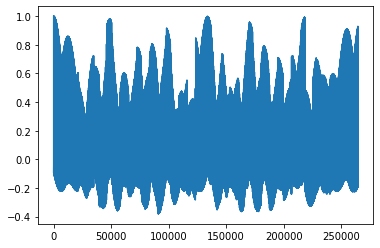

len(F): 264600
df: 0.16666666666666666
D.shape: (4097, 259)
df: 5.38330078125


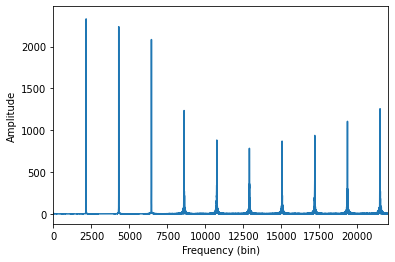

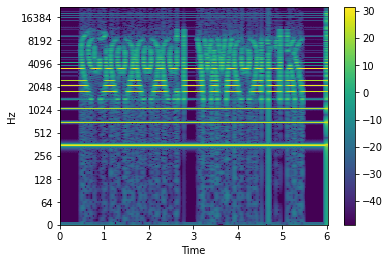

In [36]:
#5 音声の可視化
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/audio/"

y, sr = librosa.load(path + "report_audio.wav", sr = 44100)

print("sr:", sr)

# amplitude
print("len(y):",len(y)) # (sr * sec)
plt.plot(np.arange(len(y)), y)
plt.show()

# FFT
F = np.fft.fft(y)
print("len(F):", len(F))
Amp = np.abs(F)
plt.xlim([0,sr/2])
plt.xlabel('Frequency (bin)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(y)), Amp)
# 周波数分解能 df = 1/T (Tは窓幅の時間) …(1)
# 時間窓長 T = N * dt = N / sr = 10 (Nは窓のサンプル数) …(2)
# NはFFTのデータ点数と等しくなる
# (1), (2)より
# df = sr / N
print("df:", sr/len(y))

# STFT
plt.figure()
nfft = 2048 * 4
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=1024, n_fft = nfft)))
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=1024, x_axis='time', cmap='viridis')
plt.colorbar()

# df = sr / N
print("D.shape:", D.shape)
print("df:", sr/nfft)

In [37]:
# オブジェクト指向：Video クラスの作成
#オブジェクト指向
import cv2

from matplotlib import pyplot as plt

class Video:

    def __init__(self, path):
      self.path=path#self.pathという変数できた
      self.title=""
      self.id=""
      self.thum=""
        
    def makethum(self):
       #サムネイル画像の作成
     from matplotlib import pyplot as plt

     r_video = cv2.VideoCapture(self.path)
     ret, frame = r_video.read()

     show_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
     self.thum=show_frame
     plt.imshow(show_frame)

    def title_id(self):
        #ファイル名から特定の文字列（タイトルとID）を取り出す
      from matplotlib import pyplot as plt
      from google.colab import drive
      drive.mount('/content/drive')
      import numpy as np

      print("\n")

      name = self.path
      print("name: " + name)
      name = name.replace('/',' ')
      name = name.replace('-',' ')
      name = name.replace('.',' ')
      print (name)

      namelist=name.split()
      print(namelist)
      self.title=namelist[6]
      self.id=namelist[7]
      print("Title: " + namelist[6])
      print("ID: " + namelist[7])

      print("\n")

    def get_title(self):
      self.title_id()     
      print(self.title)

    def get_id(self):
      self.title_id()
      print(self.id)

    def get_thumbnail(self):
      self.makethum() 
      return self.thum

    def get_path(self):
        print(self.path)

    def nitika(self):
      import cv2
      import numpy as np
      from matplotlib import pyplot as plt
      path=self.path
      from matplotlib import pyplot as plt
      catvideo=cv2.VideoCapture(self.path)

      width = int(catvideo.get(cv2.CAP_PROP_FRAME_WIDTH))
      height = int(catvideo.get(cv2.CAP_PROP_FRAME_HEIGHT))
      fps = int(catvideo.get(cv2.CAP_PROP_FPS))
      frame_size=(int(width*0.3),int(height*0.3))
      w_video = cv2.VideoWriter(path,cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), fps ,frame_size)
      fig = plt.figure()
      ax1 = fig.add_subplot(2, 2, 1)
      print("最終フレーム")
      while True:
        ret, frame = catvideo.read()
        if not ret:
          break
          resized_frame=cv2.resize(frame,(int(width*0.3), int(height*0.3)))
          gray =cv2.cvtColor(resized_frame, cv2.IMREAD_GRAYSCALE)
          ret, resized_BW_frame = cv2.threshold(gray,128,255, cv2.THRESH_BINARY)
          ax1.imshow(resized_BW_frame)
          w_video.write(resized_BW_frame)
      catvideo.release()
      w_video.release()

video=Video("/content/drive/MyDrive/Colab Notebooks/dataset/Flowers - 66823.mp4")
video.get_title()
video.get_id()
video.get_thumbnail()
video.get_path()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


name: /content/drive/MyDrive/Colab Notebooks/dataset/Flowers - 66823.mp4
 content drive MyDrive Colab Notebooks dataset Flowers   66823 mp4
['content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'dataset', 'Flowers', '66823', 'mp4']
Title: Flowers
ID: 66823


Flowers
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


name: /content/drive/MyDrive/Colab Notebooks/dataset/Flowers - 66823.mp4
 content drive MyDrive Colab Notebooks dataset Flowers   66823 mp4
['content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'dataset', 'Flowers', '66823', 'mp4']
Title: Flowers
ID: 66823


66823


error: ignored